<a href="https://colab.research.google.com/github/PAVAN-DEVMURARI/ML-Practicals/blob/main/Practical9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd

In [174]:
df = pd.read_csv('/content/heart.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [176]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [177]:
from sklearn.model_selection import train_test_split


In [178]:
X = df.drop('target' , axis = 1)
y = df['target']

In [179]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [180]:
X_train.shape

(257, 13)

In [181]:
X_test.shape

(46, 13)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [183]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

In [184]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [185]:
y_pred_1 = lr.predict(X_test)

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
print(accuracy_score(y_test,y_pred_1))

0.8695652173913043


In [188]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [189]:
y_pred_2 = dt.predict(X_test)

In [190]:
print(accuracy_score(y_test,y_pred_2))

0.782608695652174


In [191]:
from sklearn.metrics import classification_report

In [192]:
print (f"The Classification report of the data using the logistics regresssion is "+"\n"+classification_report(y_test,y_pred_1))

The Classification report of the data using the logistics regresssion is 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46



In [193]:
print (f"The Classification report of the data using the Decision Tree is "+"\n"+classification_report(y_test,y_pred_2))

The Classification report of the data using the Decision Tree is 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.82      0.82      0.82        28

    accuracy                           0.78        46
   macro avg       0.77      0.77      0.77        46
weighted avg       0.78      0.78      0.78        46



In [194]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [195]:
print(f"The roc auc score of the data using the logistics regression is {roc_auc_score(y_test,y_pred_1)}")

The roc auc score of the data using the logistics regression is 0.863095238095238


In [196]:
print(f"The roc auc score of the data using the Decision Tree is {roc_auc_score(y_test,y_pred_2)}")

The roc auc score of the data using the Decision Tree is 0.7718253968253969


In [197]:
import matplotlib.pyplot as plt


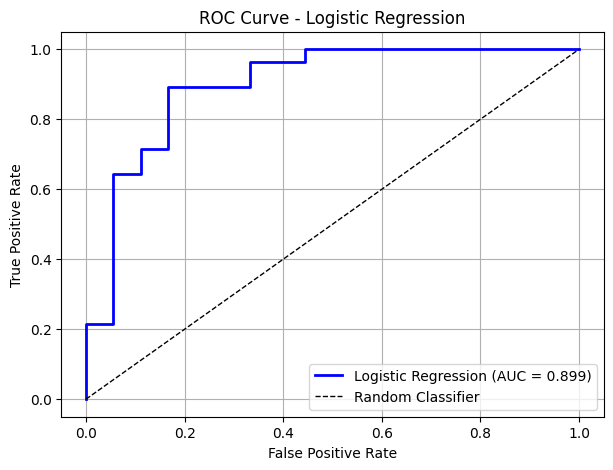

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Logistic Regression probabilities
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC
plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, color="blue", lw=2, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1, label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


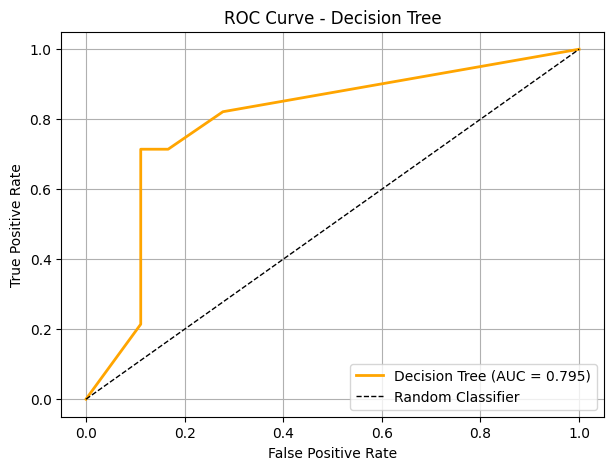

In [199]:
# Decision Tree probabilities
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, color="orange", lw=2, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1, label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [200]:
from sklearn.model_selection import KFold

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
scores_lr = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))

Logistic Regression CV Scores: [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Logistic Regression Mean Accuracy: 0.8282513661202187


In [203]:
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=5, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

Decision Tree CV Scores: [0.73770492 0.83606557 0.78688525 0.8        0.75      ]
Decision Tree Mean Accuracy: 0.7821311475409836


In [204]:
scores_lr = cross_val_score(lr, X, y, cv=6, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=6, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression CV Scores: [0.82352941 0.82352941 0.90196078 0.8        0.82       0.76      ]
Logistic Regression Mean Accuracy: 0.8215032679738562
Decision Tree CV Scores: [0.76470588 0.82352941 0.82352941 0.66       0.8        0.72      ]
Decision Tree Mean Accuracy: 0.7652941176470588


In [205]:
scores_lr = cross_val_score(lr, X, y, cv=7, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=7, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

Logistic Regression CV Scores: [0.81818182 0.81818182 0.88372093 0.86046512 0.86046512 0.76744186
 0.79069767]
Logistic Regression Mean Accuracy: 0.8284506191482934
Decision Tree CV Scores: [0.72727273 0.70454545 0.86046512 0.88372093 0.74418605 0.69767442
 0.74418605]
Decision Tree Mean Accuracy: 0.766007248565388


In [206]:
scores_lr = cross_val_score(lr, X, y, cv=8, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=8, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression CV Scores: [0.84210526 0.84210526 0.84210526 0.86842105 0.81578947 0.89473684
 0.76315789 0.72972973]
Logistic Regression Mean Accuracy: 0.8247688477951636
Decision Tree CV Scores: [0.78947368 0.76315789 0.86842105 0.81578947 0.71052632 0.68421053
 0.71052632 0.81081081]
Decision Tree Mean Accuracy: 0.7691145092460883


In [207]:
scores_lr = cross_val_score(lr, X, y, cv=9, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=9, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Scores: [0.85294118 0.79411765 0.85294118 0.91176471 0.88235294 0.88235294
 0.84848485 0.6969697  0.75757576]
Logistic Regression Mean Accuracy: 0.8310556545850664
Decision Tree CV Scores: [0.76470588 0.79411765 0.85294118 0.91176471 0.88235294 0.79411765
 0.75757576 0.72727273 0.81818182]
Decision Tree Mean Accuracy: 0.8114478114478114


In [208]:
scores_lr = cross_val_score(lr, X, y, cv=10, scoring="accuracy")
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Accuracy:", np.mean(scores_lr))
# Decision Tree CV
scores_dt = cross_val_score(dt, X, y, cv=10, scoring="accuracy")
print("Decision Tree CV Scores:", scores_dt)
print("Decision Tree Mean Accuracy:", np.mean(scores_dt))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression CV Scores: [0.87096774 0.80645161 0.83870968 0.86666667 0.9        0.76666667
 0.86666667 0.83333333 0.7        0.73333333]
Logistic Regression Mean Accuracy: 0.8182795698924732
Decision Tree CV Scores: [0.80645161 0.83870968 0.83870968 0.83333333 0.8        0.6
 0.73333333 0.8        0.7        0.8       ]
Decision Tree Mean Accuracy: 0.7750537634408602


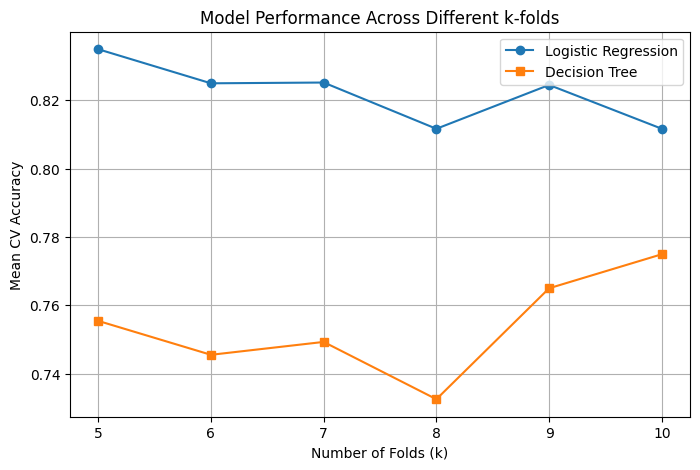

In [209]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression with scaling
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

k_values = range(5, 11)  # k=5 to k=10
lr_scores = []
dt_scores = []

for k in k_values:
    # Logistic Regression CV
    scores_lr = cross_val_score(lr, X, y, cv=k, scoring="accuracy")
    lr_scores.append(np.mean(scores_lr))

    # Decision Tree CV
    scores_dt = cross_val_score(dt, X, y, cv=k, scoring="accuracy")
    dt_scores.append(np.mean(scores_dt))

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, lr_scores, marker="o", label="Logistic Regression")
plt.plot(k_values, dt_scores, marker="s", label="Decision Tree")

plt.xlabel("Number of Folds (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("Model Performance Across Different k-folds")
plt.legend()
plt.grid(True)
plt.show()
